
<img src="../images/5thNRST_logo.png" alt="NOWPAP" width="900" height="700">

## NOWPAP REMOTE SENSING TRAINING COURSE   
#### Webinar 2: Monitoring and Assessment of Water Quality by Ocean Color Remote Sensing
<span style="color:brown; font-size:1.1em;font-style:italic">Time series analysis: monthly composites from daily images</span>
<hr style="border:2px solid rgb(30,70,125)"> </hr>

<span style="font-family:Helvieta; font-size:2em;">Eligio Maure (maure@npec.or.jp)</span>

***
**Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

# Table of contents
- [1. Purpose](#1.-Purpose)
- [2. Library import](#2.-Library-import)
- [3. Define parameters](#3.-Define-parameters)
- [4. Data preallocation](#4.-Data-preallocation)
- [5. Create the composite](#5.-Create-the-composite)
- [6. Display the result](#6.-Display-the-result)
- [7. Save the result](#7.-Save-the-result)
***

# 1. Purpose
[Return to the "Table of contents"](#Table-of-contents)

The objective of this exercise is to create composite images from a series of other satellite images obtained in the [Marine Environmental Watch](https://ocean.nowpap3.go.jp/?page_id=862) of Northwest Pacific Action Plan (NOWPAP).

You will learn how to read, composite and display the result of your composite image.
***

# 2. Library import
[Return to the "Table of contents"](#Table-of-contents)

In [1]:
# Data manipulation
import numpy as np

# Library import
from netCDF4 import Dataset

# System
import sys
from pathlib import Path

# Visualization
import matplotlib.pyplot as plt
from matplotlib import colors, ticker

%matplotlib inline

In [2]:
sys.path.append(str(Path('.').absolute().parent)) 
import sutils as util

# 3. Define parameters
[Return to the "Table of contents"](#Table-of-contents)

In [3]:
VAR = 'chlor_a'    # variable name 
COMP = 'month'   # composite period ('day', 'month', 'year')

INTPUT_DIR = Path('.').absolute().joinpath(r'data\SGLI\day')
OUTPUT_DIR = Path('.').absolute().joinpath(r'data\SGLI\month')
if not OUTPUT_DIR.is_dir():
    OUTPUT_DIR.mkdir(parents=True)

INPUT_FILES = list(INTPUT_DIR.glob('*.nc'))

# 4. Data preallocation
[Return to the "Table of contents"](#Table-of-contents)
- Define a function to preallocate memory for the composite

In [4]:
def preallocate(file: Path, varname: str, t: int):   
    with Dataset(file, 'r') as nc:
        shape = np.ma.squeeze(nc[varname][:]).shape
    shape = (t,) + shape
    return np.ma.empty(shape=shape, dtype=np.float32)

# 5. Create the composite
[Return to the "Table of contents"](#Table-of-contents)

In [5]:
%%time

# preallocate
file = INPUT_FILES[0] # We need a file to get the shape of data
t = len(INPUT_FILES) # we need to count the number of composite files
data = preallocate(file=file, t=t, varname=VAR)

for i, f in enumerate(INPUT_FILES):
    print(f'{i}.', end='')
    with Dataset(f, 'r') as nc:
        sds = nc[VAR][:]
        data[i, :, :] = np.ma.log10(sds)
count = data.count(axis=0)
count = np.ma.masked_where(count == 0, count)
np.ma.set_fill_value(count, fill_value=sds.fill_value)

mean = data.mean(axis=0).astype(np.float32)
mean = np.ma.power(10, mean)
np.ma.set_fill_value(mean, fill_value=sds.fill_value)
    
print(f'\nComposite done!')

0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.20.21.22.23.24.25.26.27.28.29.
Composite done!
Wall time: 1.84 s


# 6. Display the result
[Return to the "Table of contents"](#Table-of-contents)
- Use matplotlib to display the composite image (we display both composite and count)

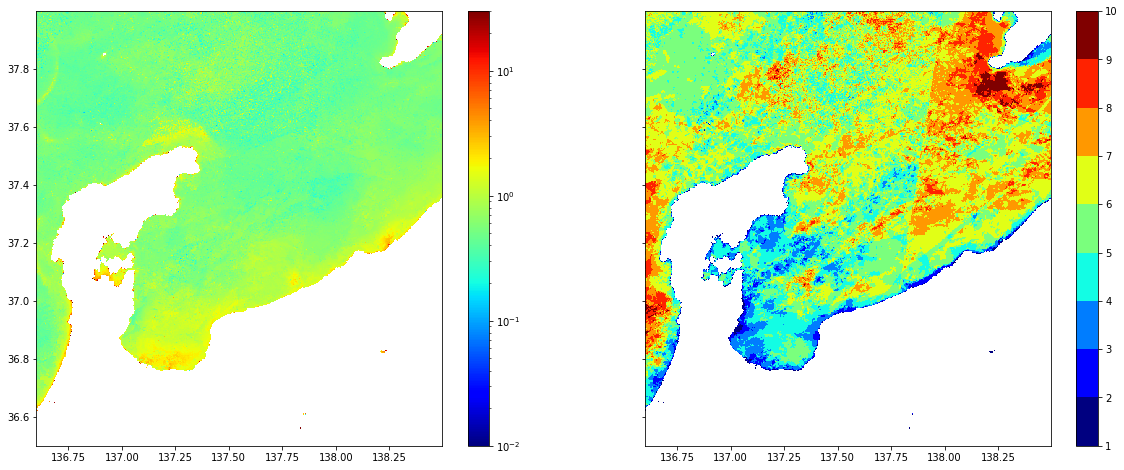

In [6]:
fig, ax = plt.subplots(1,2, figsize=(20,8), sharey=True)

with Dataset(file, 'r') as nc:
    lat = nc['lat'][:]
    lon = nc['lon'][:]

# LogNorm for chlorophyll data
norm = colors.LogNorm(vmin=0.01, vmax=30)
m1 = ax[0].pcolormesh(lon, lat, mean, cmap='jet', norm=norm)

# linear scale for count data
nbins = count.max() - count.min() 
levels = ticker.MaxNLocator(nbins=nbins).tick_values(count.min(), count.max())
norm = colors.BoundaryNorm(levels, ncolors=256, clip=True)
m2 = ax[1].pcolormesh(lon, lat, count, cmap='jet', norm=norm)

plt.colorbar(m1, ax=ax[0], orientation='vertical')
plt.colorbar(m2, ax=ax[1], orientation='vertical')

# 7. Save the result 
[Return to the "Table of contents"](#Table-of-contents)

In [7]:
# Create a filename to save the data
save = OUTPUT_DIR.joinpath('GS202104_CHL_TB_month.nc')

util.nc_write(
    file=save
    , data=mean
    , varname=VAR
    , lon=lon
    , lat=lat
    , count=count)

NCWRITE: GS202104_CHL_TB_month | Elapsed:  0 hours  0 minutes 0.164 seconds


<div class="alert alert-block alert-success"/div>
    <b>Done!</b><br>
  
--- 

#### And thank you for your attention! :) 
    Now try the same exercise with other months or sensors, etc.
    We hope you enjoyed the training provided by NOWPAP CEARAC.

# 5. Resources
[Go back to the "Table of contents"](#Table-of-contents)
1. https://ocean.nowpap3.go.jp/?page_id=2345